 # Linear Regression

### Bike Sharing Dataset

### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 2. Read the data (copy the path)

In [3]:
df = pd.read_csv(r"C:\Users\sonic\Downloads\day (1).csv")

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### 4. Data Analysis and Preparation

In [5]:
df.shape

(731, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###  Summary statistics

In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Distribution of variables

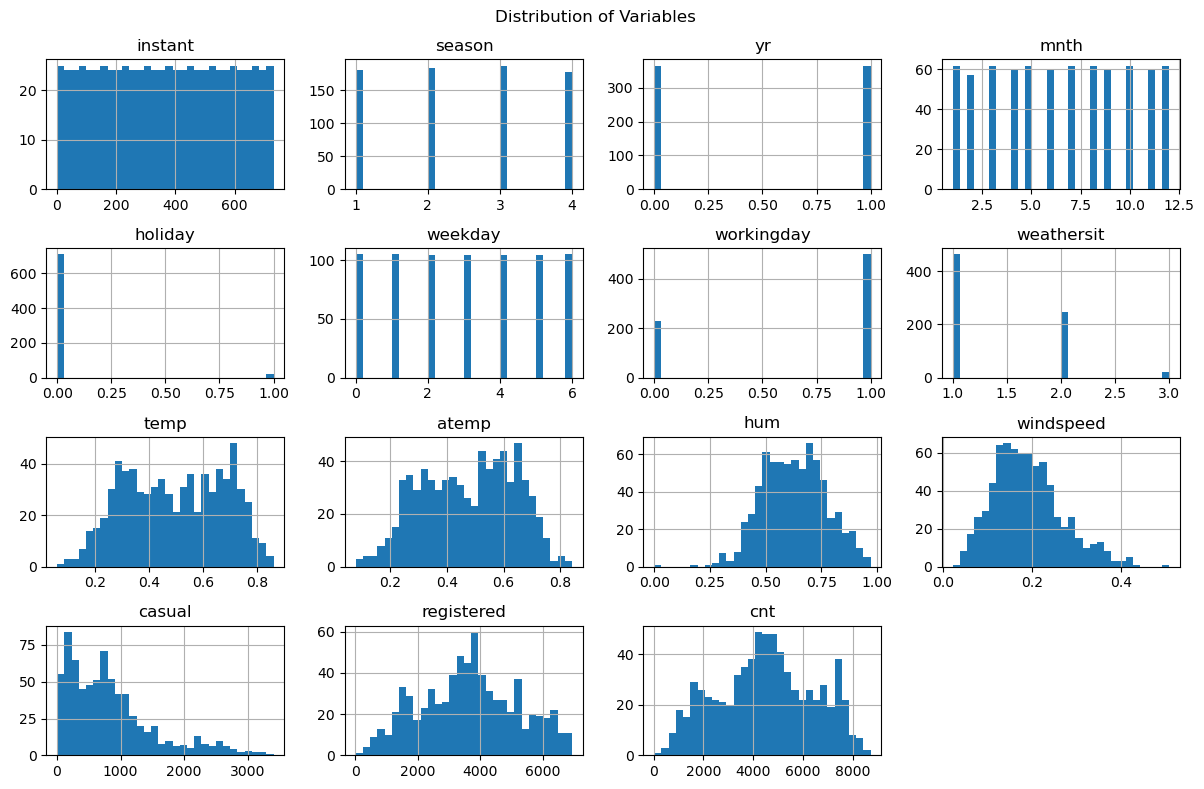

In [10]:
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Variables")
plt.tight_layout()
plt.show()

In [88]:
df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df['dteday'] = pd.to_datetime(df['dteday'])  # convert to datetime
df['dteday'] = df['dteday'].view('int64') / 1e9 # convert to Unix timestamp (seconds since 1970-01-01)

C:\Users\sonic\AppData\Local\Temp\ipykernel_16532\3552373219.py:2: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['dteday'] = df['dteday'].view('int64') / 1e9 # convert to Unix timestamp (seconds since 1970-01-01)


In [90]:
df = df.drop('dteday', axis=1)

### Correlation heatmap

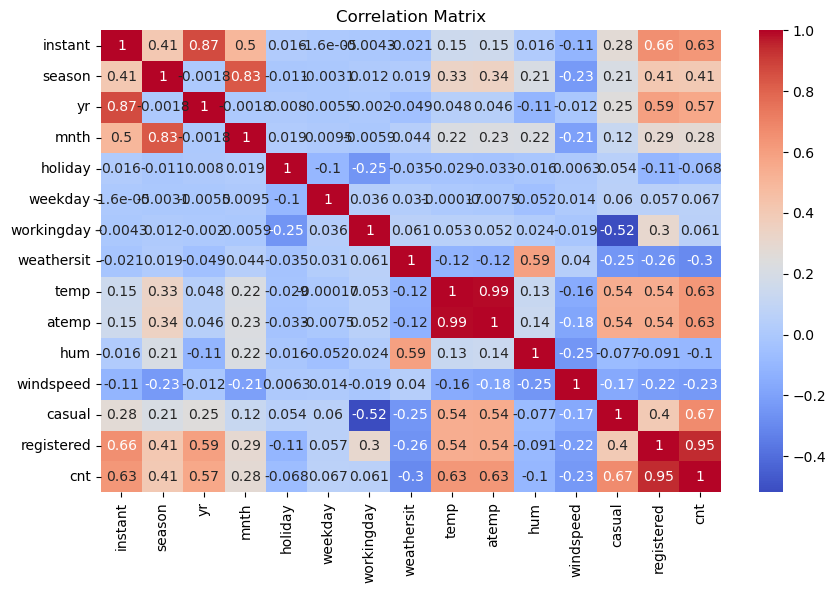

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [92]:
 ### Detect outliers (boxplots)

In [1]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(2, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


NameError: name 'df' is not defined

### Check for missing values

In [94]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Useing missingo for missing value chart...

In [95]:
pip install missingno                                              # Install the missingo library 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [96]:
import missingno as msno                             # import the library missingno for missing values chart

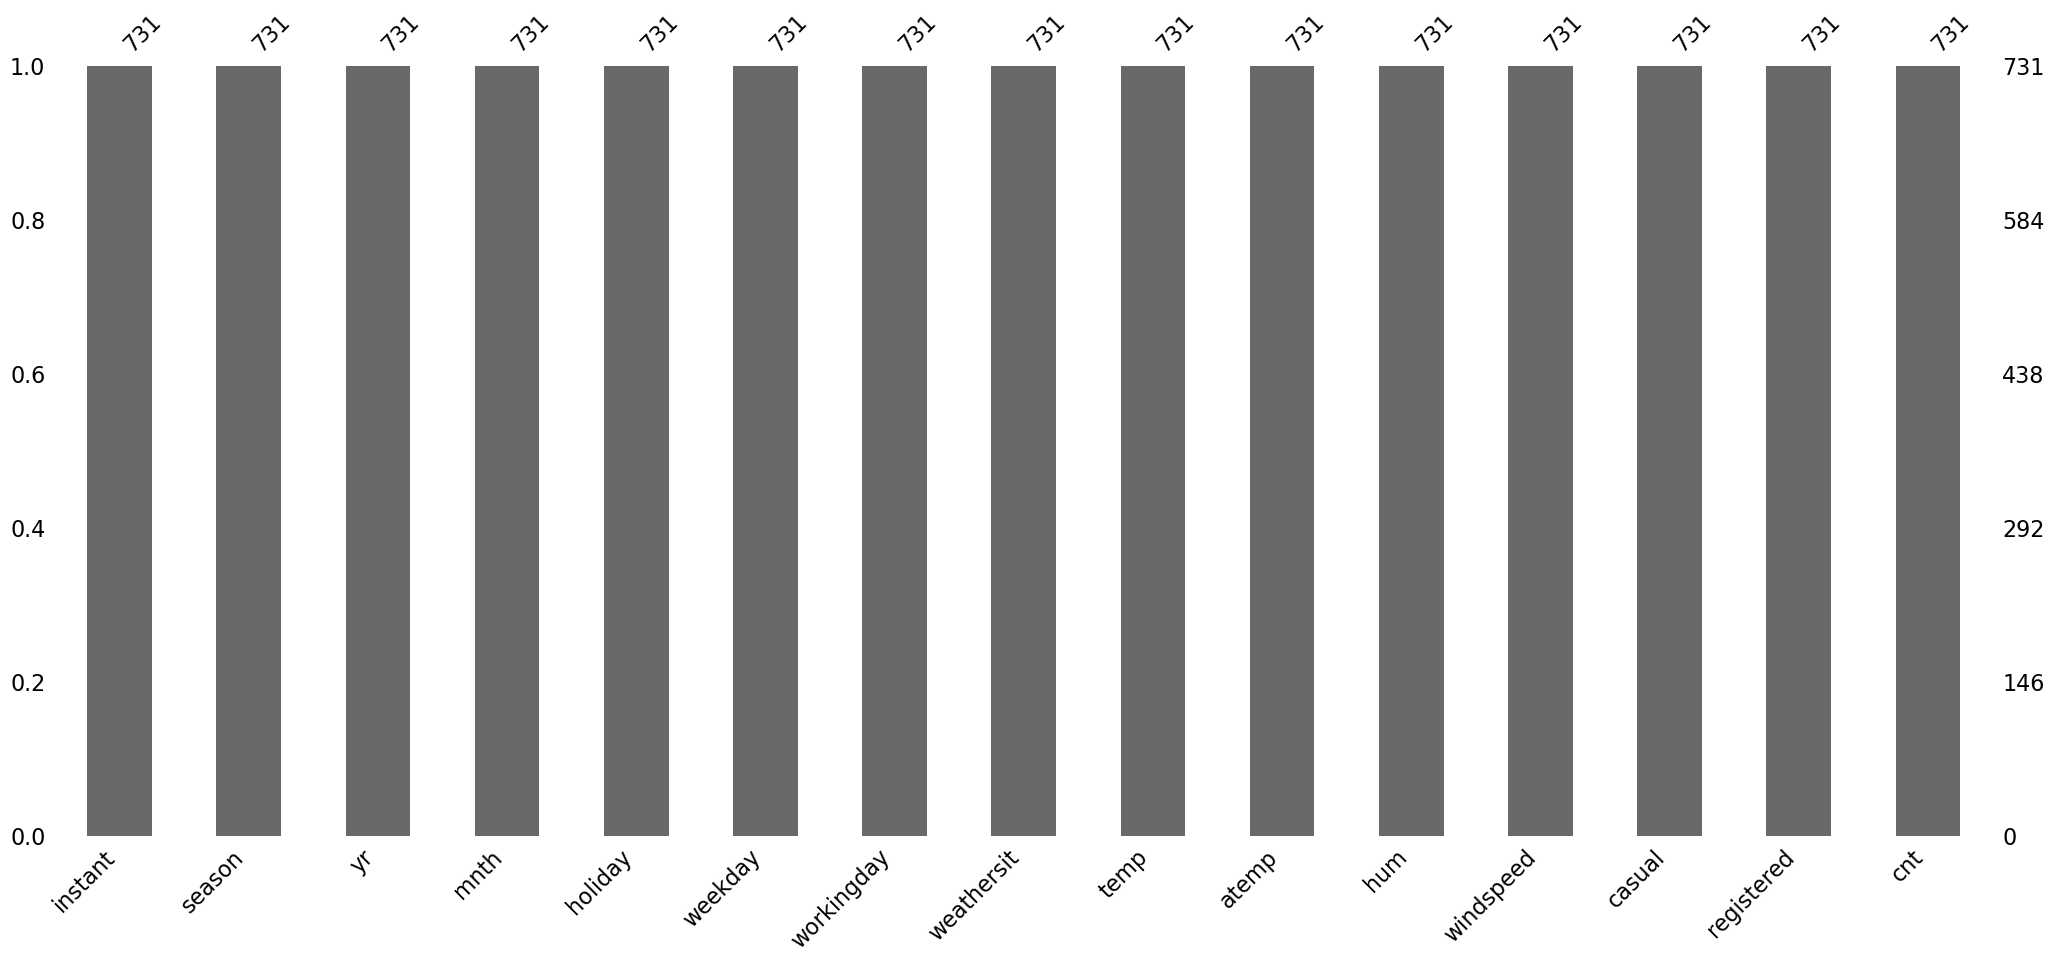

In [97]:
msno.bar(df)                                      # Visualize missing values as a bar chart
plt.show()

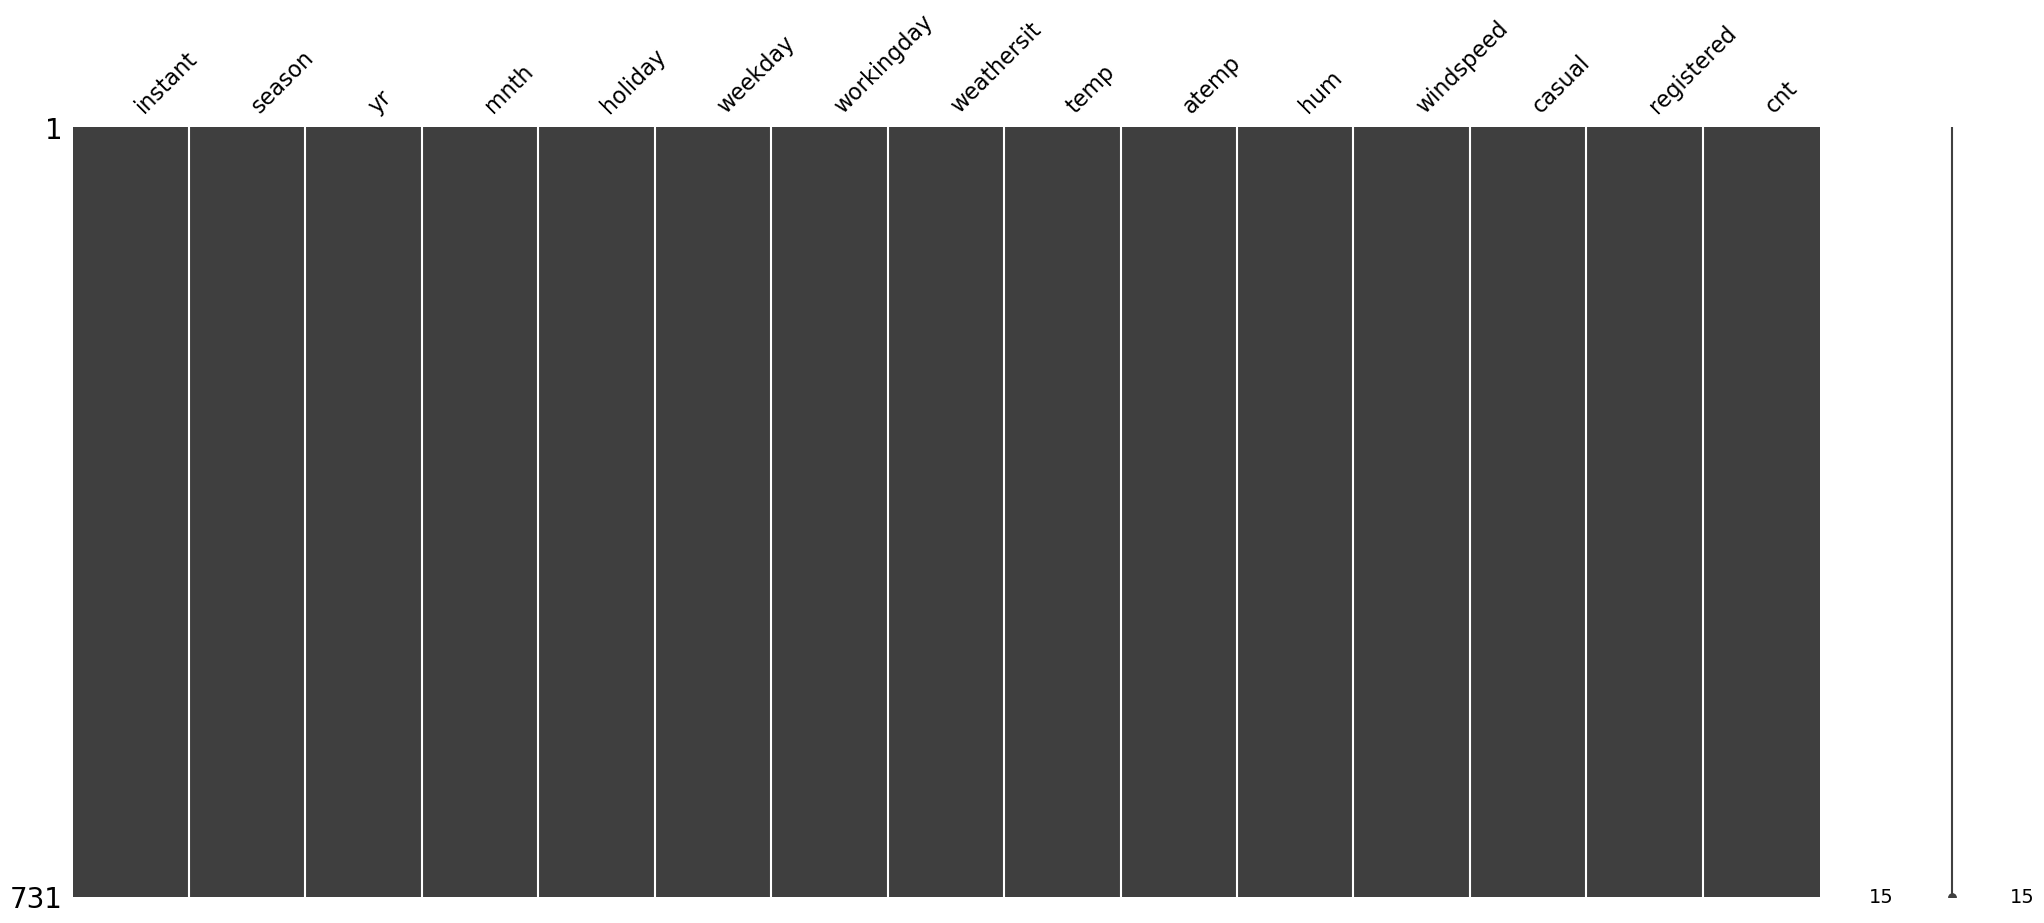

In [98]:
msno.matrix(df)                               # Or as a matrix
plt.show()

In [99]:
df[df.duplicated()]
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [100]:
df.drop('instant', axis =1, inplace=True)

### 5. Prepare the Data

### Convert categorical variables

In [101]:
df = pd.get_dummies(df, drop_first=True)

### Plot a feature (plot)

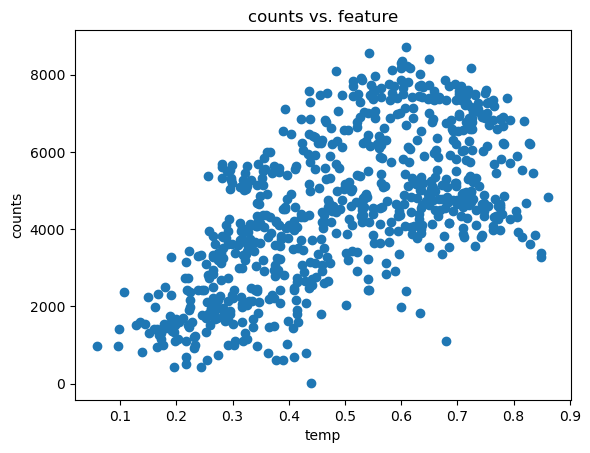

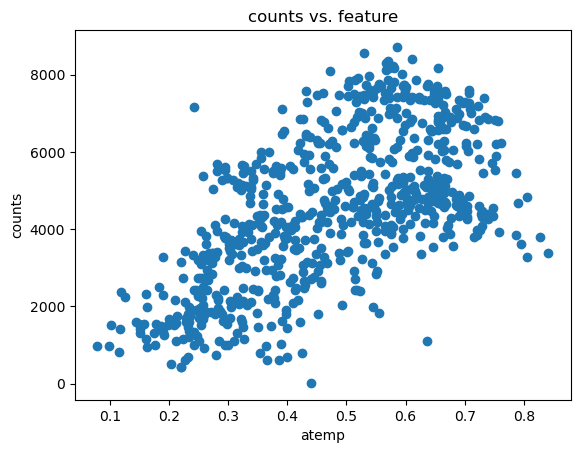

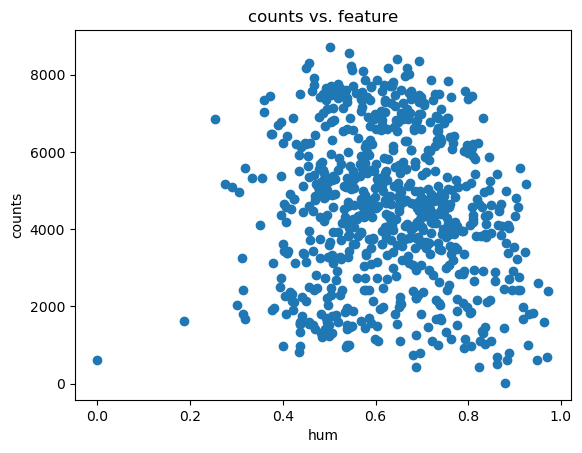

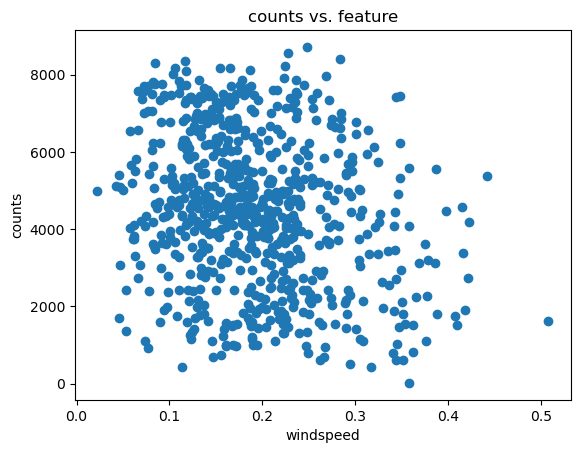

In [106]:
features = ['temp', 'atemp', 'hum', 'windspeed']
for feature in features:
    plt.figure()
    plt.scatter(df[feature], df['cnt'])
    plt.title('counts vs. feature')
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.show()

### Define features and target

In [107]:
X = df[['temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

### Train/test split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.Linear Regression

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 Score: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2 Score:  0.499471718408134
MAE:  1191.424708132052
MSE:  2007059.491290338
RMSE:  1416.7072708539115


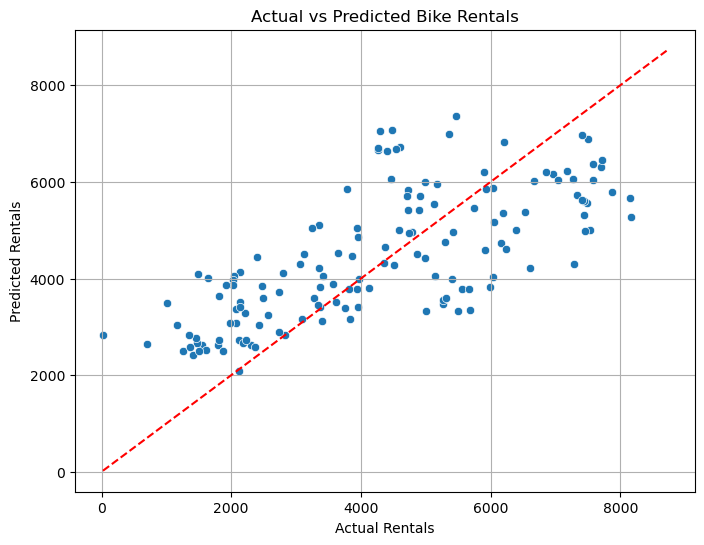

In [112]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.grid(True)
plt.show()

In [113]:
### --------------------***----------------------------###

### Regularized Regression (Ridge)

In [114]:
from sklearn.linear_model import Ridge

In [115]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [116]:
ridge = Ridge()
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}


In [117]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [118]:
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]})

In [119]:
y_pred_ridge = ridge_cv.predict(X_test)

In [120]:
print("\nBest Ridge Parameters:")
print(ridge_cv.best_params_)


Best Ridge Parameters:
{'alpha': 1.0}


In [121]:
print("\nRidge Regression Performance:")
print("R2 Score: ", r2)
print("RMSE: ", rmse)


Ridge Regression Performance:
R2 Score:  0.499471718408134
RMSE:  1416.7072708539115


In [122]:
### 7. Conclusion and Interpretation

In [123]:
print("\nConclusion:")
print("Linear Regression R² : ",  r2_score(y_test, y_pred))
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))


Conclusion:
Linear Regression R² :  0.499471718408134
Ridge Regression R²: 0.4868953363471551
